In [1]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import re

In [2]:
# 그래프 폰트 설정
plt.style.use('ggplot')

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

In [3]:
# 2012 ~ 2022 국제유가
iop_mean_df= pd.read_csv('./Data/' + 'International_Oil_Prices_mean(20120701_20220630).csv')

In [4]:
iop_mean_df.head()

,연도,유가
0,12,715.837538
1,13,716.119679
2,14,635.935833
3,15,361.830046
4,16,315.390772


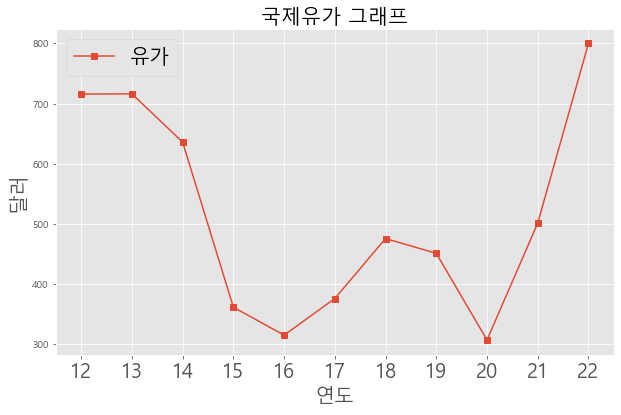

In [62]:
plt.figure(figsize=(10,6))
plt.plot(iop_mean_df['연도'], iop_mean_df['유가'], marker='s')
plt.xticks(iop_mean_df['연도'], fontsize=20)
plt.ylabel('달러', fontsize=20)
plt.xlabel('연도', fontsize=20)
plt.title('국제유가 그래프', fontsize=20)
plt.legend(['유가'], fontsize=20)

- 유가 상승 -> 경기 침체 -> 유로소비 감소 -> 유가 하락 -> 경기 회복 -> 유가 상승 (다양한 외부 변수의 영향 받음)
- 유가 상승이 범지구적 경기 개선으로인해 상승한 것이라면 부정적인 요인이 일부 상쇄될 수 있음. <-> 원유 수급 불안정, 투기 충격에 의한 것이라면 구매력 저하로 이어질 수 있음.
- 브렌트유 > 서부 텍사스 중질유 > 두바이유 : 황 함량이 적을수록 공정처리가 쉬워져 고급으로 침.


- 2000년대 : 유가 대상승 -> 이라크 전쟁, 베네수엘라 석유 파업 -> 고유가 시대, 투기수요 급증


- 2014 ~ 2016 : 유가 폭락 -> 세계경제 완만한 회복세, 미국 양적완화 종결 고려에도 불구 -> 미국 달러화 강세, 중국 성장률 둔화에 따른 수요 감소, 이란 핵협상 타결


- 2016 ~ 2019 : 유가 소폭 상승 -> 사우디아라비아, 러시아, 카타르, 베네수엘라 생산동결 합의, 미국이 해외자원 의존도를 낮추기 위해 석유 생산을 대폭 늘림, 부유 산유국이 유가를 후려침.


- 2020 : 유가 하락 -> 코로나로 인한 수요 감소와 원유 생산량 조절 합의 실패 -> 러시아 원유 감산 거부, 사우디아리비아 무제한 원유 공급정책


- 2021 : 유가 대상승 -> 코로나19 경제위기 해결을 위한 양적완화, 코로나19의 수요 감소 이후 억눌렸던 수요 대두, 모든 자산가격 상승 / 코로나 변이바이러스 출현으로 단기적인 하락세도 있었음.


- 2022: 유가 대상승-> 우크라이나-러시아 전쟁, 러시아의 석유 및 천연가스 공급 축소, 엔데믹에 대한 기대로 수요 급증 => 유가가 치솟지만 전쟁이라는 변수로 불안정함.

In [6]:
# 2012 ~ 2021 주요 원자재 가격 동향(석유화학분야)
petrochemical_df = pd.read_csv('./Data/' + '주요 원자재 가격 동향(석유화학분야).csv', encoding='cp949')
petrochemical_df = petrochemical_df.set_index('연도')
petrochemical_df = petrochemical_df.T
petrochemical_df

연도,유가,나프타,에틸렌,프로필렌,HDPE,PP
2012,109.12,947.33,"1,227.52","1,227.52","1,329.71","1,385.36"
2013,105.33,926.15,"1,314.19","1,399.25","1,434.67","1,455.71"
2014,96.4,862.24,"1,419.28","1,333.31","1,469.25","1,456.30"
2015,50.97,493.87,"1,099.03",836.79,"1,202.67","1,060.51"
2016,41.36,400.03,"1,094.23",758.37,"1,112.60",951
2017,53.1,497,"1,194.00",919.5,"1,125.30","1,047.60"
2018,69.43,615.66,"1,250.42","1,082.85","1,178.29","1,201.27"
2019,63.59,526.38,891.87,915.31,911.96,"1,029.65"
2020,41.42,372.65,700.81,791.36,791.19,870.56
2021,69.26,647.94,"1,046.67","1,041.75","1,062.63","1,139.40"


In [7]:
petrochemical_df.에틸렌.unique()  # 700.81 이것 때문에 apply(lambda x : x.replace(‘,’, ‘’) 안됨.
# for문으로 ,를 없애고 예외처리해야 함.

array(['1,227.52', '1,314.19', '1,419.28', '1,099.03', '1,094.23',
       '1,194.00', '1,250.42', '891.87', 700.81, '1,046.67'], dtype=object)

In [8]:
# pet_shape = petrochemical_df.shape[0]  # petrochemical_df.shape[0] => (10,7) ->  [0]은 10을 말하는 것, 에틸렌의 하위요소들
# for i in range(pet_shape):
#     try:
#         petrochemical_df['에틸렌'][i] = petrochemical_df['에틸렌'][i].replace(',','')
#     except AttributeError:
#         pass

# => ['에틸렌']도 for문으로 돌리려면?

In [9]:
pet_shape0 = petrochemical_df.shape[0]
for j in petrochemical_df.columns[:]:
    for i in range(pet_shape0):
        try:
            petrochemical_df[j][i] = petrochemical_df[j][i].replace(',','')
        except AttributeError:
            pass

In [10]:
# petrochemical_df['index'] = petrochemical_df['index'].astype('int64')
# petrochemical_df['유가'] = petrochemical_df['유가'].astype('float64')
# petrochemical_df['나프타'] = petrochemical_df['나프타'].astype('float64')
# petrochemical_df['에틸렌'] = petrochemical_df['에틸렌'].astype('float64')
# petrochemical_df['프로필렌'] = petrochemical_df['프로필렌'].astype('float64')
# petrochemical_df['HDPE'] = petrochemical_df['HDPE'].astype('float64')
# petrochemical_df['PP'] = petrochemical_df['PP'].astype('float64')

# --> for문으로
for i in petrochemical_df.columns[:]:
    petrochemical_df[i] = petrochemical_df[i].astype('float64')

In [11]:
petrochemical_df.dtypes

연도
유가      float64
나프타     float64
에틸렌     float64
프로필렌    float64
HDPE    float64
PP      float64
dtype: object

In [12]:
# petrochemical_df['나프타'].apply(lambda x : (x - petrochemical_df['나프타'].min()) / ( abs(petrochemical_df['나프타'].max()) - petrochemical_df['나프타'].min()) )

In [13]:
pet_df_copy = petrochemical_df.copy()

for i in pet_df_copy.columns:
    try:
        pet_df_copy[i] = pet_df_copy[i].apply(lambda x : (x - pet_df_copy[i].min()) / (abs(pet_df_copy[i].max()) - pet_df_copy[i].min()))
    except TypeError:
        pass
pet_df_copy

연도,유가,나프타,에틸렌,프로필렌,HDPE,PP
2012,1.000000,1.000000,0.733100,0.732040,0.794207,0.878888
2013,0.944067,0.963145,0.853731,1.000000,0.949002,0.998993
2014,0.812279,0.851935,1.000000,0.897110,1.000000,1.000000
2015,0.141824,0.210935,0.554261,0.122363,0.606849,0.324291
2016,0.000000,0.047644,0.547580,0.000000,0.474014,0.137331
2017,0.173259,0.216381,0.686445,0.251420,0.492744,0.302250
2018,0.414256,0.422861,0.764973,0.506304,0.570893,0.564602
2019,0.328070,0.267505,0.265926,0.244882,0.178111,0.271605
2020,0.000885,0.000000,0.000000,0.051476,0.000000,0.000000
2021,0.411747,0.479032,0.481384,0.442173,0.400319,0.458975


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

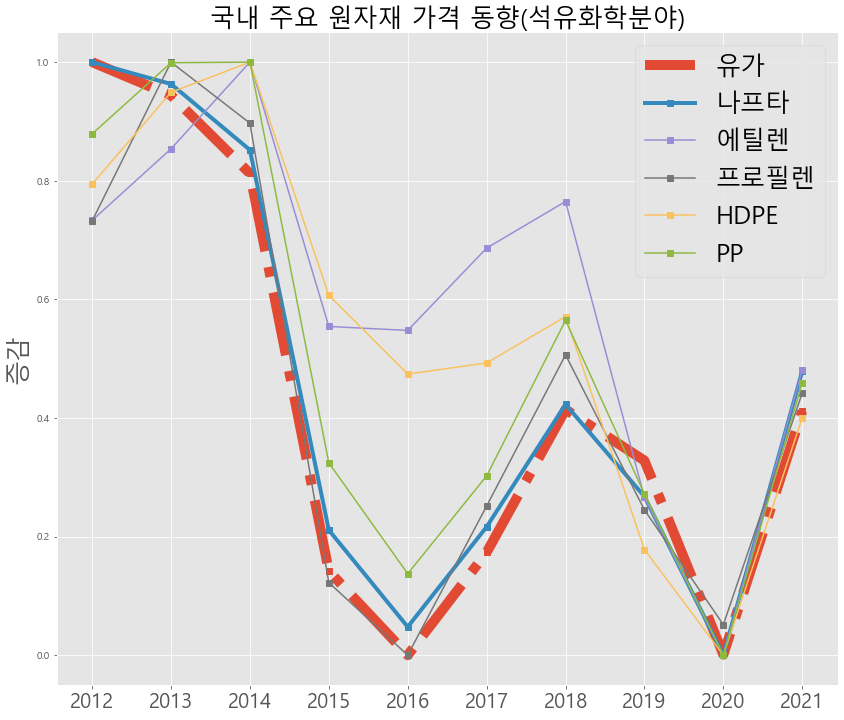

In [74]:
plt.figure(figsize=(14,12))
plt.plot(pet_df_copy.index, pet_df_copy['유가'], marker='s', linestyle='dashdot', linewidth=10)
plt.plot(pet_df_copy.index, pet_df_copy['나프타'], marker='s', linewidth=4)
plt.plot(pet_df_copy.index, pet_df_copy['에틸렌'], marker='s')
plt.plot(pet_df_copy.index, pet_df_copy['프로필렌'], marker='s')
plt.plot(pet_df_copy.index, pet_df_copy['HDPE'], marker='s')
plt.plot(pet_df_copy.index, pet_df_copy['PP'], marker='s')
plt.legend(pet_df_copy.columns[:], fontsize=25)
plt.ylabel('증감', fontsize=25)
plt.title('국내 주요 원자재 가격 동향(석유화학분야)', fontsize=25)
plt.xticks(fontsize=20)
# https://index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1144
# 국제 유가 및 주요 석유화학제품 가격 동향

- 나프타, 프로필렌, 에틸렌 등은 의복의 섬유를 가공하기 전 원자재 => 나일론 섬유, 폴리프로필렌, 폴리에틸렌 등
- 국내 석유화학업계는 정제된 나프타를 주 원료로 사용, 총 수요에서 수출의존도가 49.5%(2018년도 기준)로 높아 국제유가의 영향력 큼.
- 기초유분에 가까울 수록(공정을 덜 거친 것을 취급할수록) 국제유가를 많이 받음.
- 수직계열화(상품의 생산과 공정, 유통, 분배 등의 여러 단계를 통합하여 운영 하는 것)가 낮을 수록 영향 많이 받음.
- 섬유, 의류산업도 간접적인 영향을 받음. 특히, 의류산업은 기초유분과는 멀지만, 수직계열화 정도는 낮음.
- 국제유가 -> 석유화학 -> 섬유 / 의류산업에 대한 간접영향 참고

In [75]:
# 섬유산업 동향 
# 생산액, 부가가치액: 십억원 / 수출액, 수입액: 백만불

In [76]:
textile_trend = pd.read_csv('./Data/' + '섬유산업 동향.csv', encoding='cp949')
textile_trend = textile_trend.set_index('연도')
textile_trend = textile_trend.T
textile_trend
# 2020년도 생산액, 부가가치액이 없어 대략적인 임의의 수치 넣음

연도,생산액,부가가치액,수출액,수입액
2012,"45,254","16,589","15,695","11,712"
2013,"45,163","16,633","16,072","13,261"
2014,"43,874","16,394","16,096","14,376"
2015,"41,538","16,155","14,490","14,287"
2016,"40,998","16,100","13,807","14,491"
2017,"40,113","15,770","13,742","15,175"
2018,"39,393","15,642","14,080","17,120"
2019,"37,887","15,295","12,959","17,110"
2020,"37,000","15,000","11,238","16,203"


In [77]:
trend_shape0 = textile_trend.shape[0]
for j in textile_trend.columns[:]:
    for i in range(trend_shape0):
        try:
            textile_trend[j][i] = textile_trend[j][i].replace(',','')
        except AttributeError:
            pass

In [78]:
for i in textile_trend.columns:
    textile_trend[i] = textile_trend[i].astype('float64')
textile_trend.dtypes

연도
생산액      float64
부가가치액    float64
수출액      float64
수입액      float64
dtype: object

In [79]:
# 섬유산업 동향과 국제유가를 합침.
text = pd.merge(textile_trend, petrochemical_df['유가'], how='inner', 
                left_on=textile_trend.index, right_on=petrochemical_df.index)
text

,key_0,생산액,부가가치액,수출액,수입액,유가
0,2012,45254.0,16589.0,15695.0,11712.0,109.12
1,2013,45163.0,16633.0,16072.0,13261.0,105.33
2,2014,43874.0,16394.0,16096.0,14376.0,96.40
3,2015,41538.0,16155.0,14490.0,14287.0,50.97
4,2016,40998.0,16100.0,13807.0,14491.0,41.36
5,2017,40113.0,15770.0,13742.0,15175.0,53.10
6,2018,39393.0,15642.0,14080.0,17120.0,69.43
7,2019,37887.0,15295.0,12959.0,17110.0,63.59
8,2020,37000.0,15000.0,11238.0,16203.0,41.42


In [80]:
try:
    text = text.set_index('key_0')
except KeyError:
    pass
text_copy = text.copy()

for i in text_copy.columns:
    text_copy[i] = text_copy[i].apply(lambda x: (x-text_copy[i].mean())/text_copy[i].std())
text_copy

,생산액,부가가치액,수출액,수입액,유가
key_0,,,,,
2012,1.331267,1.116460,0.916724,-1.772034,1.449695
2013,1.301036,1.193713,1.154599,-0.899936,1.308959
2014,0.872820,0.774089,1.169742,-0.272183,0.977356
2015,0.096783,0.354466,0.156410,-0.322290,-0.709623
2016,-0.082609,0.257900,-0.274541,-0.207437,-1.066476
2017,-0.376613,-0.321497,-0.315553,0.177660,-0.630528
2018,-0.615802,-0.546232,-0.102287,1.272709,-0.024137
2019,-1.116107,-1.155476,-0.809600,1.267079,-0.240997
2020,-1.410775,-1.673422,-1.895494,0.756431,-1.064248


In [81]:
# 정규화 방법 1 ==> (컬럼의 특정 데이터 값 - 컬럼의 최솟값) / (컬럼의 최댓값의 절댓값 - 컬럼의 최솟값)
# textile_trend_copy = textile_trend.copy()
# for i in textile_trend_copy.columns:
#     try:
#         textile_trend_copy[i] = textile_trend_copy[i].apply(lambda x : (x-textile_trend_copy[i].min()) / (abs(textile_trend_copy[i].max())-textile_trend_copy[i].min()))
#     except TypeError:
#         pass
# textile_trend_copy.head(3)

In [82]:
# 방법2 ==> (X - 평균) / 표준편차
textile_trend_copy = textile_trend.copy()

for i in textile_trend_copy.columns:
    try:
        textile_trend_copy[i] = textile_trend_copy[i].apply(lambda x : (x-textile_trend_copy[i].mean()) / textile_trend_copy[i].std())
    except TypeError:
        pass
textile_trend_copy.head()

연도,생산액,부가가치액,수출액,수입액
2012,1.331267,1.116460,0.916724,-1.772034
2013,1.301036,1.193713,1.154599,-0.899936
2014,0.872820,0.774089,1.169742,-0.272183
2015,0.096783,0.354466,0.156410,-0.322290
2016,-0.082609,0.257900,-0.274541,-0.207437


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


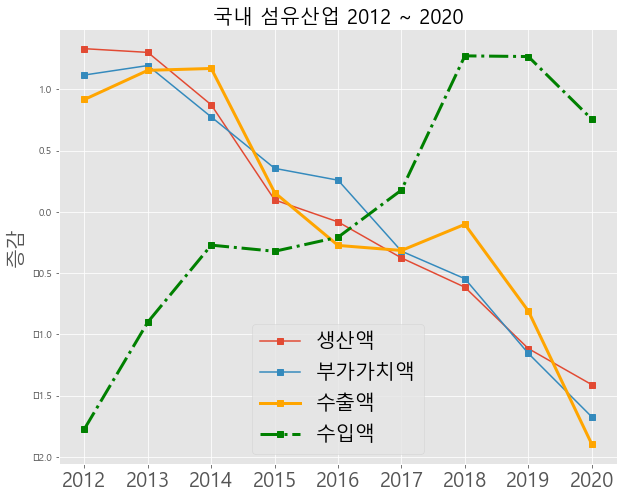

In [83]:
plt.figure(figsize=(10,8))
plt.plot(textile_trend.index, textile_trend_copy['생산액'], marker='s')
plt.plot(textile_trend.index, textile_trend_copy['부가가치액'], marker='s')
plt.plot(textile_trend.index, textile_trend_copy['수출액'], marker='s', color='orange', linewidth=3)
plt.plot(textile_trend.index, textile_trend_copy['수입액'], marker='s', color='g', linestyle='dashdot', linewidth=3)
plt.legend(textile_trend.columns, fontsize=20)
plt.ylabel('증감', fontsize=20)
plt.title('국내 섬유산업 2012 ~ 2020', fontsize=20)
plt.xticks(fontsize=20)
# http://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxSearch.do?idx_cd=1160&stts_cd=116001&clas_div=&idx_sys_cd=# 

- 생산액, 부가가치액, 수입액 : 지속적으로 감소 => 국내 생산여건 악화, 생산기지 해외 이전
- 수출은 2016년도부터 회복세를 보였지만 코로나19로 인하 급락함.
- 수입은 꾸준히 증가세(해외소싱 확대 등), 코로나19로 하락세.


- 국제유가와의 연관성?

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


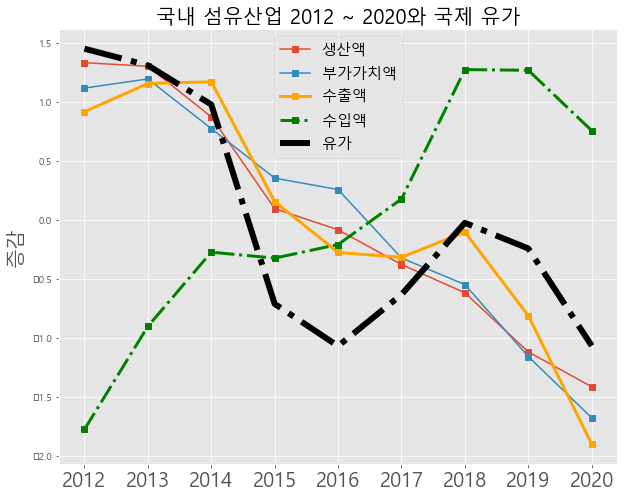

In [73]:
plt.figure(figsize=(10,8))
plt.plot(text_copy.index, text_copy['생산액'], marker='s')
plt.plot(text_copy.index, text_copy['부가가치액'], marker='s')
plt.plot(text_copy.index, text_copy['수출액'], marker='s', color='orange', linewidth=3)
plt.plot(text_copy.index, text_copy['수입액'], marker='s', color='g', linestyle='dashdot', linewidth=3)
plt.plot(text_copy.index, text_copy['유가'], color='black', linewidth=6, linestyle='dashdot')
plt.legend(text_copy.columns, fontsize=15)
plt.ylabel('증감', fontsize=20)
plt.title('국내 섬유산업 2012 ~ 2020와 국제 유가', fontsize=20)
plt.xticks(fontsize=20)

- 대한민국의 섬유산업 수출 추이는 국제유가의 영향을 일부 받음. 상승과 하강의 정도는 다르지만, 국제유가가 등락할 때 섬유산업의 수출도 변화추이가 비슷함.
- 하지만 그 외 섬유산업에 대한 변수도 크게 작용 => 기본적으로 국내 섬유산업 자체는 꾸준히 하향하였음-> 인건비 증가와 생산시설 해외 이전 등이 원인이 됨 -> 근래에는 코로나 판데믹으로 인한 매장 축소, 소비 심리 축소의 요인으로 그 폭이 더 커짐.

- 2020년 이후 수출액 소폭 증가, 수입액 소폭 하락
- 큰 변수가 없는 한, 2020년 이후로 국제유가가 상승하면서 국내 섬유산업의 수출도 상승함. 하지만 불안정함.